<a href="https://colab.research.google.com/github/rishuptdr/mobile-price-predection/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mobile Price Prediction



##Introduction
Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.

The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.


In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

###Data Description -
Battery_power - Total energy a battery can store in one time measured in mAh
Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions
Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

##Methodology
We will proceed with reading the data, and then perform data analysis. The practice of examining data using analytical or statistical methods in order to identify meaningful information is known as data analysis. After data analysis, we will find out the data distribution and data types. We will train 4 classification algorithms to predict the output. We will also compare the outputs. Let us get started with the project implementation

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
#some more 

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from scipy.interpolate import interp1d

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Import relevent data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path= "/content/drive/MyDrive/ml 2/Copy of data_mobile_price_range.csv"
df= pd.read_csv(file_path)

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


 the info function to see the type of data in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Now, we remove the data points with missing data.

In [ ]:
data_f = df[df['sc_w'] != 0]

In [ ]:
data_f.shape

(1820, 21)

##Univariate analasis

In [ ]:
df['price_range'].sort_values(ascending=False)

1999    3
1297    3
1287    3
465     3
466     3
       ..
1360    0
1361    0
1362    0
1363    0
1398    0
Name: price_range, Length: 2000, dtype: int64

##Let us visualize the number of elements in each class of mobile phones.

So, there are mobile phones in 4 price ranges. The number of elements is almost similar.

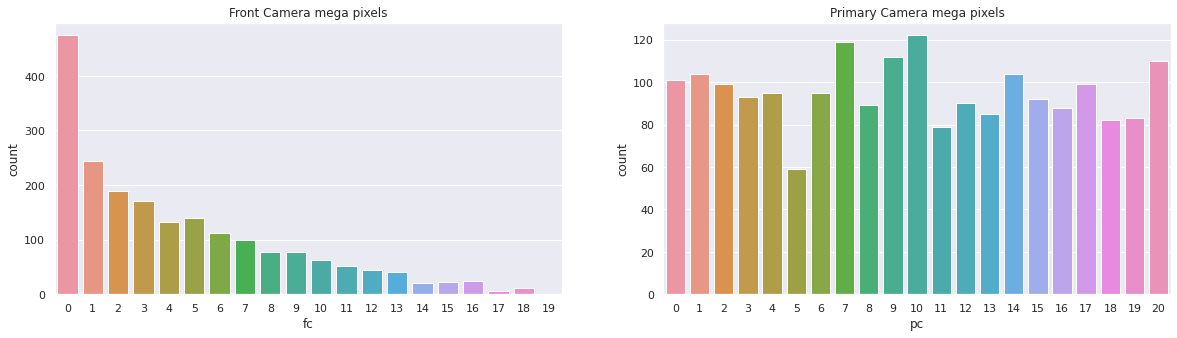

In [ ]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Front Camera mega pixels')
ax=sns.countplot(x="fc",data=df,ax=ax9)
ax10.set_title('Primary Camera mega pixels')
ax=sns.countplot(x="pc",data=df,ax=ax10)

##Data Distribution
Let us analyse some data features and see their distribution.



In [ ]:
# categorical and continuous separation

categoricals = [ 'blue',  'dual_sim',  'four_g',
         'three_g', 'touch_screen', 'wifi', 'n_cores']

continuous = ['battery_power','clock_speed','fc','int_memory','m_dep']

more_to = ['mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time']

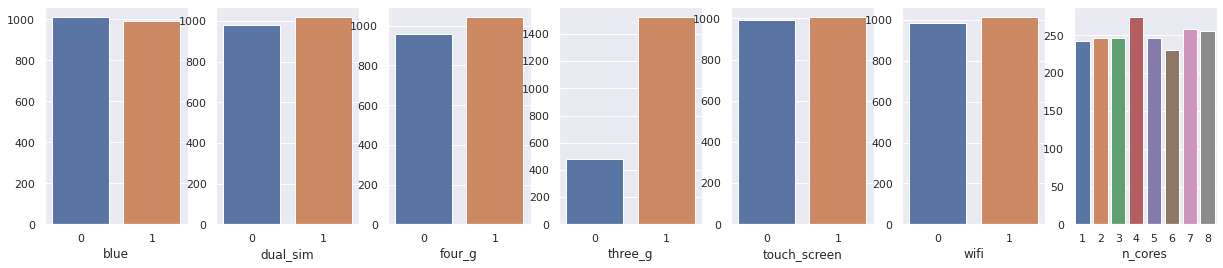

In [ ]:
fig, axs = plt.subplots(1, len(categoricals), figsize=(21,4))

for i in range(len(categoricals)):
    sns.countplot(x=df[categoricals[i]], ax=axs[i])
    axs[i].set_ylabel('')

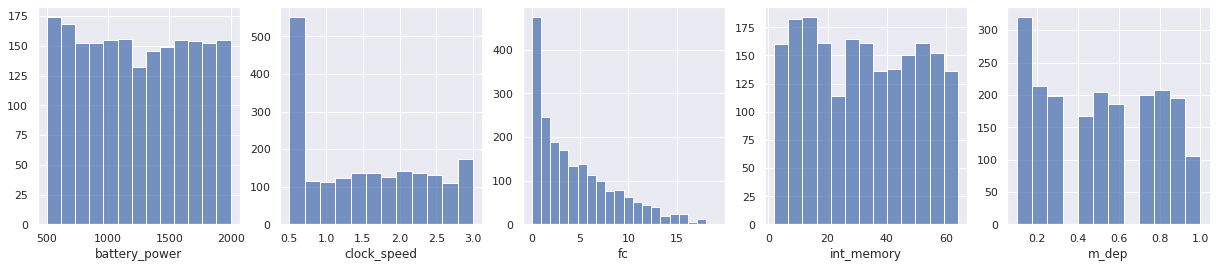

In [ ]:
fig, axs = plt.subplots(1, len(continuous), figsize=(21,4))

for i in range(len(continuous)):
    sns.histplot(x=df[continuous[i]], ax=axs[i])
    axs[i].set_ylabel('')

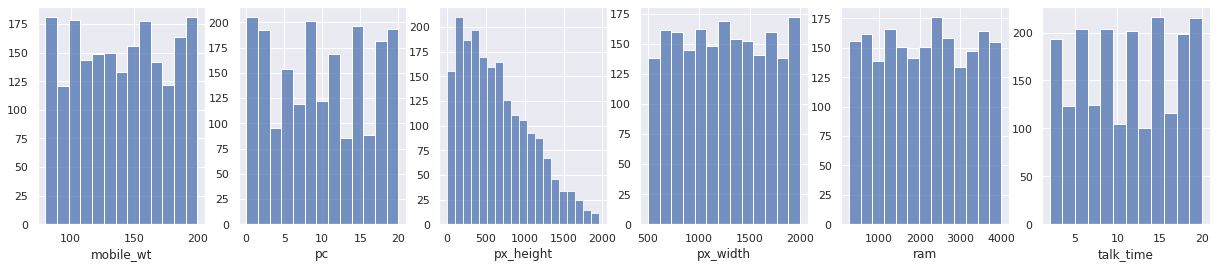

In [ ]:
fig, axs = plt.subplots(1, len(more_to), figsize=(21,4))

for i in range(len(more_to)):
    sns.histplot(x=df[more_to[i]], ax=axs[i])
    axs[i].set_ylabel('')

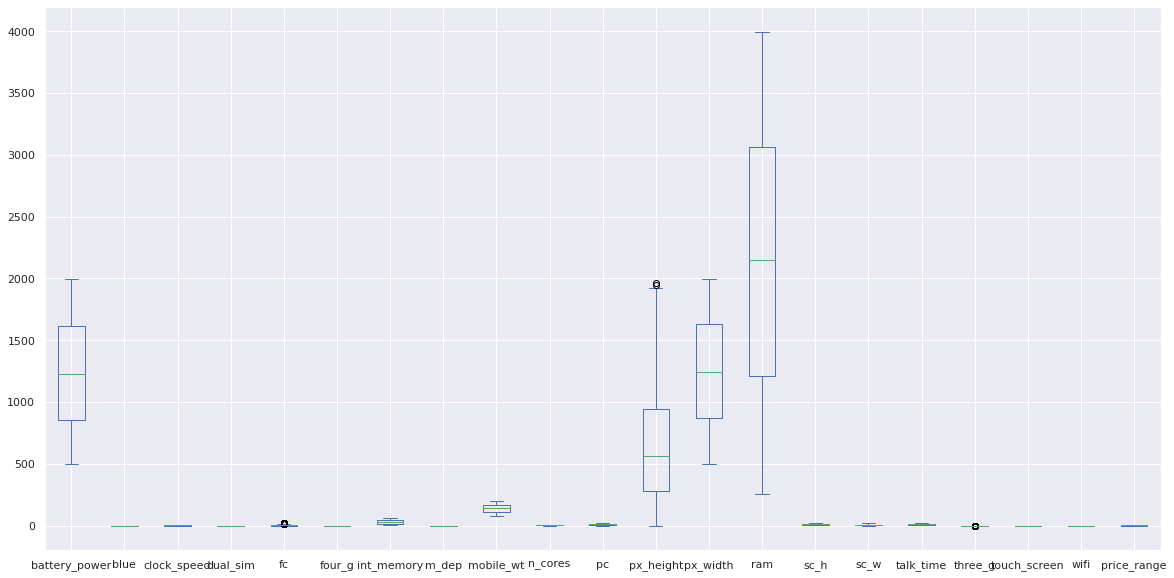

In [ ]:
df.plot(kind='box',figsize=(20,10))
plt.show()

##Bivariate Analysis

###Random Access Memory in Mega Bytes

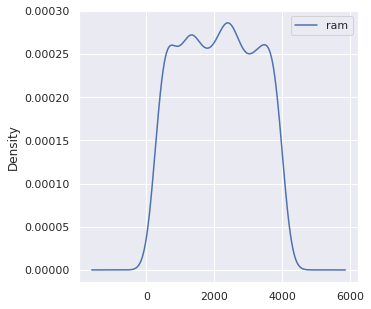

In [ ]:
df.plot(x='price_range',y='ram',kind='kde')
plt.show()

###Now, we see the count of how many devices have Bluetooth and how many don’t.

So, we can see that half the devices have Bluetooth, and half don’t.

In [ ]:
df.plot(x='price_range',y='ram',kind='hexbin')
plt.show()

###analyse the mobile depth ( in cm).

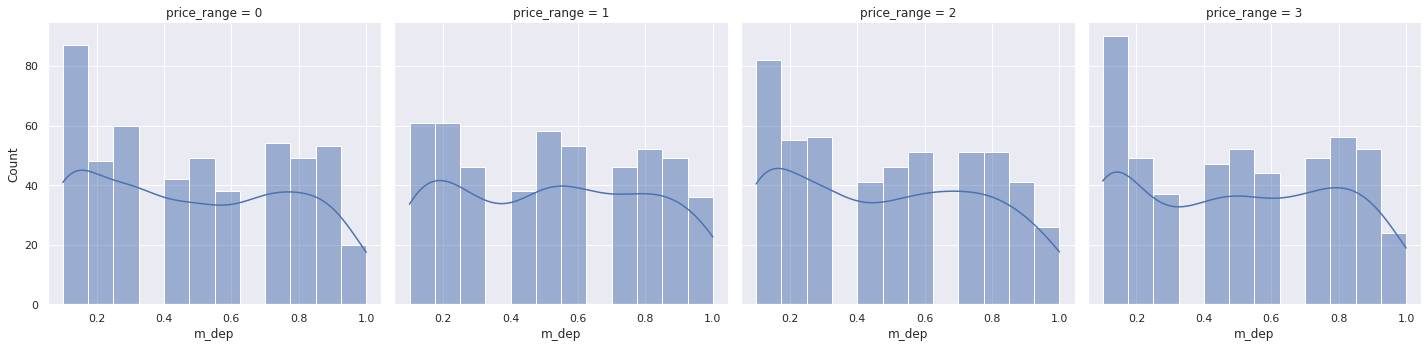

In [ ]:
sns.displot(data=df, x="m_dep", col="price_range", kde=True)

A few mobiles are very thin and a few ones are almost a cm thick.

most of  phones Front Camera are  not available  


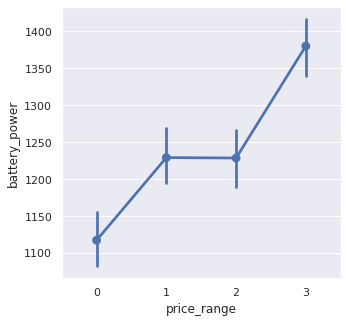

In [ ]:
sns.pointplot(y= 'battery_power', x = 'price_range', data=df)

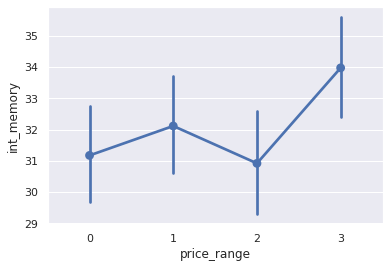

In [ ]:
sns.pointplot(y='int_memory',x='price_range',data=df,kind='strip')

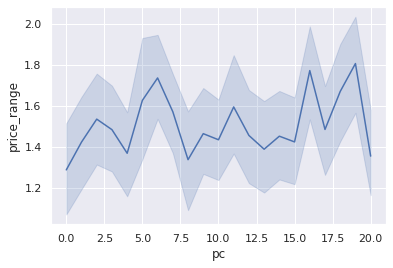

In [ ]:
sns.lineplot(x='pc',y='price_range',data=df)

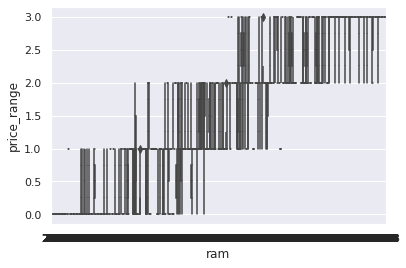

In [ ]:
sns.boxplot(x='ram',y='price_range',data=df)

##ml class

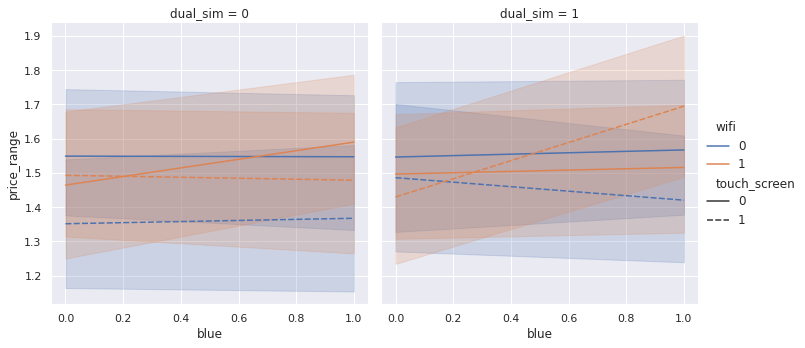

In [ ]:

sns.relplot(
    data=df, kind="line",
    x="blue", y="price_range", col="dual_sim",
    hue="wifi", style="touch_screen",
)

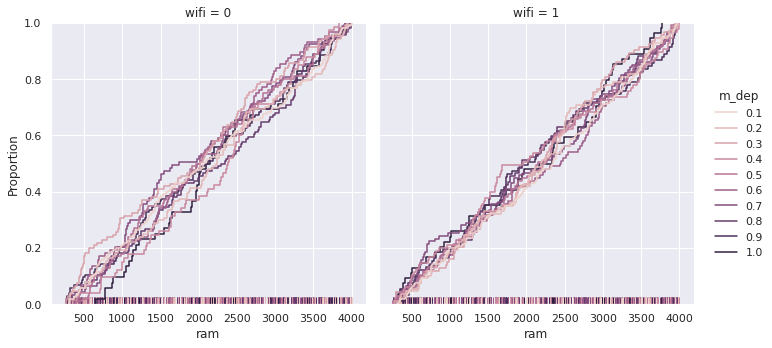

In [ ]:
sns.displot(data=df, kind="ecdf", x="ram", col="wifi", hue="m_dep", rug=True)

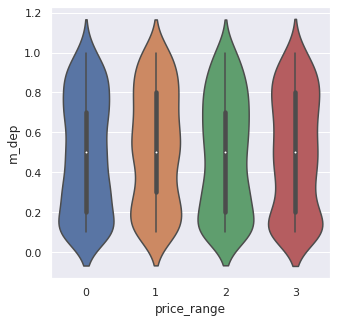

In [ ]:
sns.violinplot(x='price_range',y='talk_time',data=df)

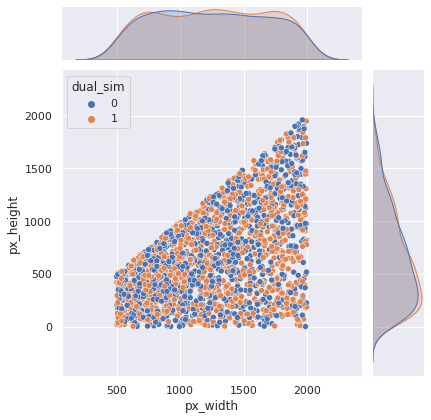

In [ ]:
sns.jointplot(x='px_width',y='px_height', hue="dual_sim",data=df)

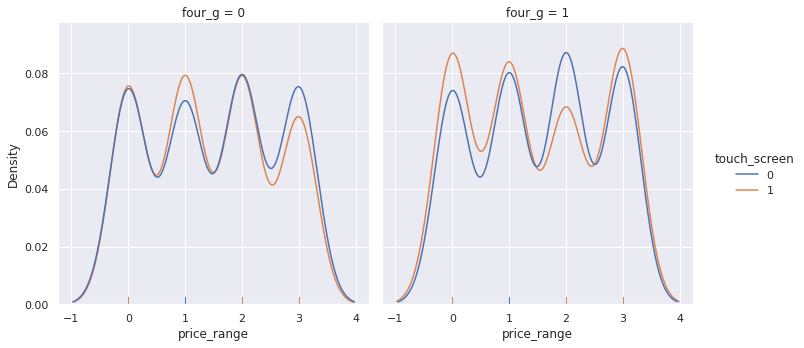

In [ ]:
sns.displot(data=df, kind="kde", x="price_range", col="four_g", hue="touch_screen", rug=True)

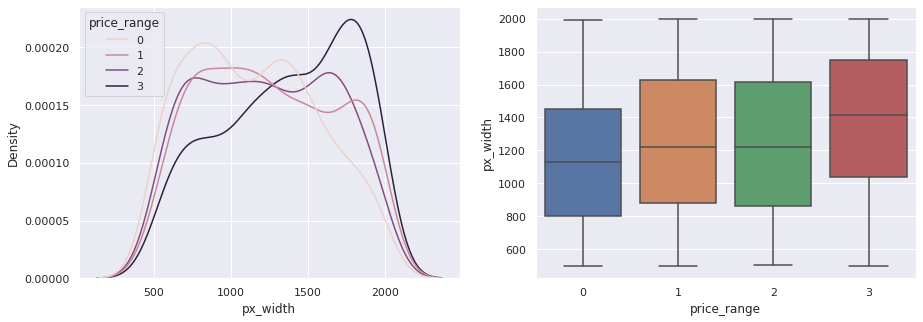

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show()

###Pixel Resolution Width

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

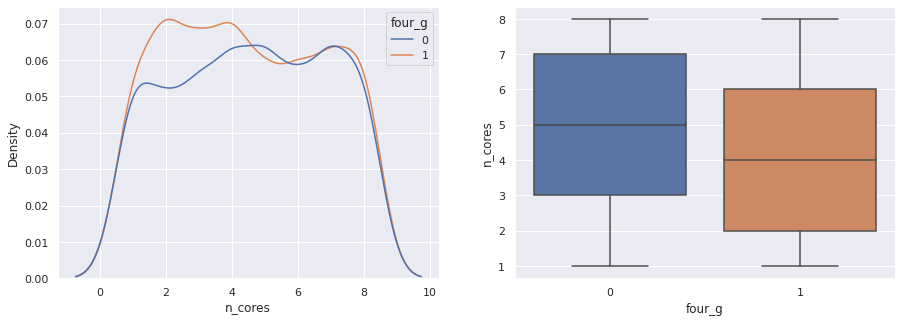

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='n_cores', hue='four_g', ax=axs[0])
sns.boxplot(data=df, x='four_g', y='n_cores', ax=axs[1])
plt.show()

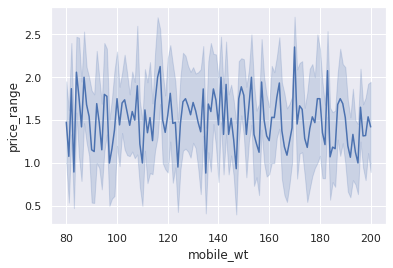

In [ ]:
sns.lineplot(x='mobile_wt',y='price_range',data=df)

Weight of mobile phone 80gm to 200gm

In a similar way, the data distribution can be analysed for all the data features. Implementing that will be very simple.

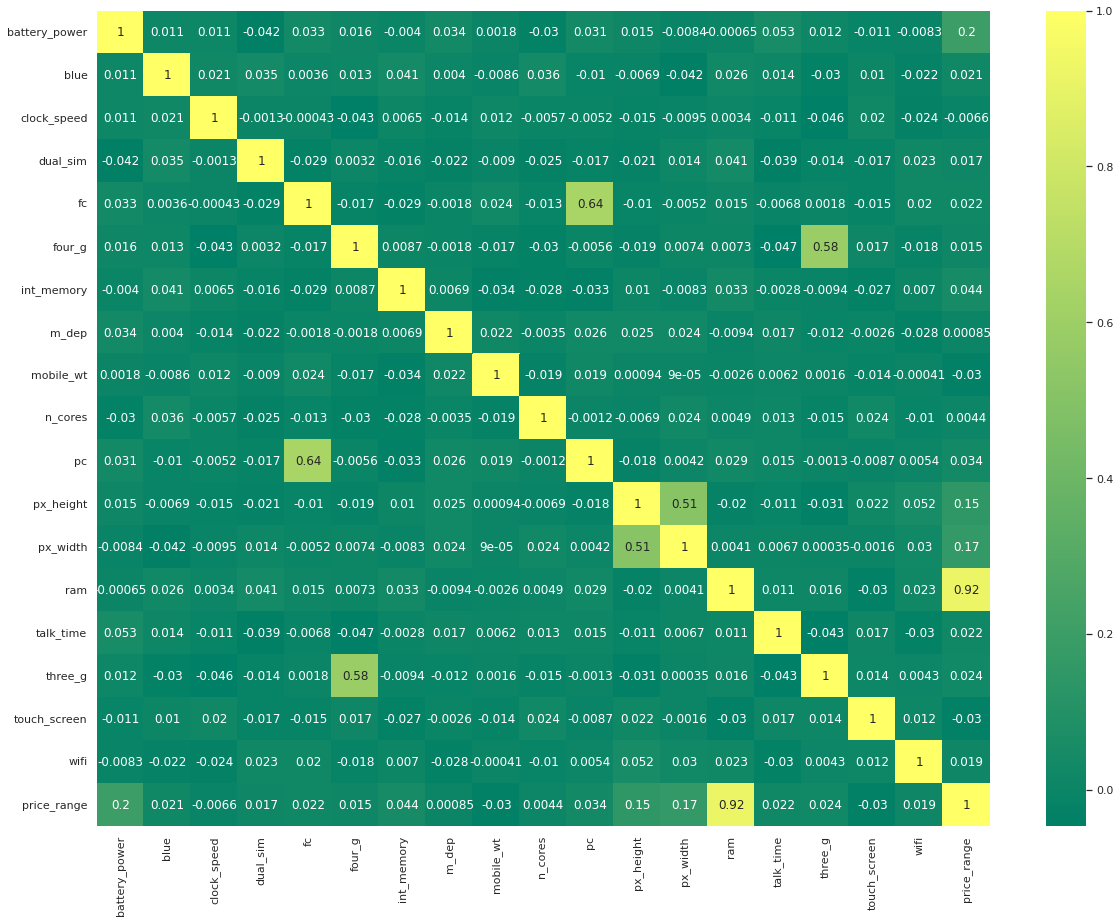

In [ ]:
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'summer', annot = True)

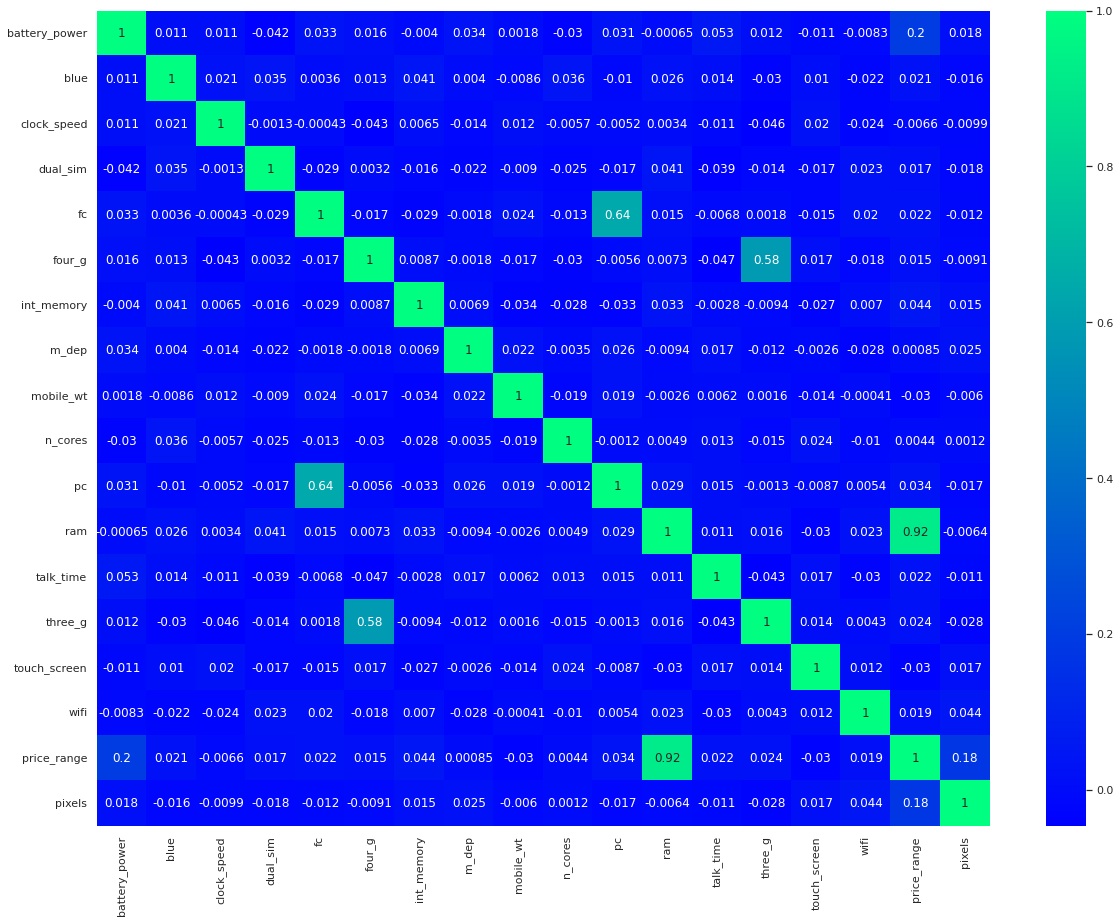

In [ ]:
#  defining new variable for pixels

df['pixels'] = df['px_height']*df['px_width']
# Dropping px_height and px_width

df.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'winter', annot = True)



#training and testing

In [ ]:
X = df.drop('price_range',axis=1)

In [ ]:
y = df['price_range']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
q=X_train[X_train['sc_w']==0]
pd.get_option("display.max_columns")

20

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
q.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

###knn

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1400, 20)
(600, 20)


In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test)

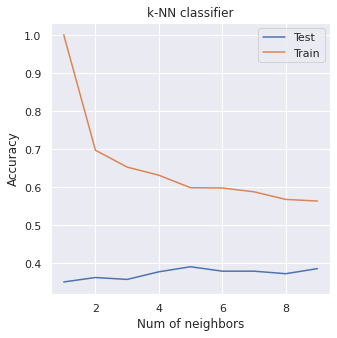

In [ ]:
plt.title('k-NN classifier')
plt.plot(neighbors, test_accuracy, label='Test')
plt.plot(neighbors, train_accuracy, label='Train')
plt.legend()
plt.xlabel('Num of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = gnb.predict(X_test)

###Let us see if there are any missing values or missing data.



In [ ]:
X=data_f.drop(['price_range'], axis=1)
y=data_f['price_range']
#missing values
X.isna().any()

Let us split the data.

In [ ]:
#test split of data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

Now, definong  a function for creating a confusion matrix.

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
   

Now, as the function is defined, we can proceed with implementing the classification algorithms.

RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.

There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

##Random Forest Classifier

A random forest system is built on a variety of decision trees. Every decision tree is made up of nodes that represent decisions, leaf nodes, and a root node. The leaf node of each tree represents the decision tree’s final result. The final product is chosen using a majority-voting procedure. In this situation, the output picked by the majority of the decision trees becomes the random forest system’s ultimate output. Let us now implement the random forest algorithm.

First, we build the model.

In [ ]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,max_depth= 7,max_features= 15,min_samples_leaf= 3,min_samples_split= 10,n_estimators= 200,random_state=7)

Now, we do the training and prediction

In [ ]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)

Let us apply the function for the accuracy metrics.

Random Forest Classifier Accuracy Score:  0.895
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       109
           1       0.86      0.94      0.90        89
           2       0.84      0.83      0.83       106
           3       0.90      0.85      0.88        96

    accuracy                           0.90       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.90      0.90      0.90       400



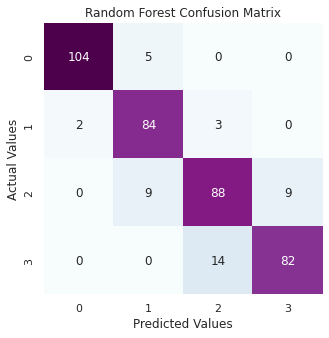

In [ ]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')

that the random forest algorithm has good accuracy in prediction.

##Naive Bayes

Naive Bayes is a Naive Bayes variation that allows continuous data and follows the Gaussian normal distribution. The Bayes theorem is the foundation of a family of supervised machine learning classification algorithms known as naive Bayes. It is a basic categorization approach with a lot of power. When the dimensionality of the inputs is high, they are useful. The Naive Bayes Classifier may also be used to solve complex classification issues.

Let us implement the Gaussian NB classifier.

Gaussian NB Classifier Accuracy Score:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        95
           1       0.79      0.73      0.76        92
           2       0.74      0.80      0.77        86
           3       0.92      0.93      0.93        91

    accuracy                           0.85       364
   macro avg       0.84      0.85      0.84       364
weighted avg       0.85      0.85      0.85       364



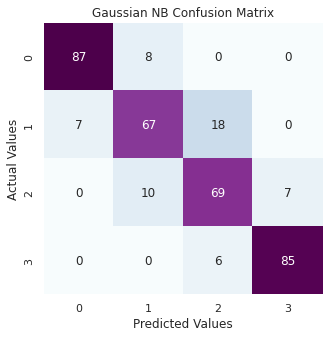

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_valid)


print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')

that the model is performing well.

##KNN Classifier

he K-NN method saves all available data and classifies a new data point based on its similarity to the existing data. This implies that fresh data may be quickly sorted into a well-defined category using the K-NN method. The K-NN algorithm is a non-parametric algorithm, which means it makes no assumptions about the underlying data. It’s also known as a lazy learner algorithm since it doesn’t learn from the training set right away; instead, it saves the dataset and performs an action on it when it comes time to classify it.

Let us perform the implementation of the classifier.

KNN Classifier Accuracy Score:  0.9340659340659341
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.87      0.88      0.88        86
           3       0.94      0.90      0.92        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



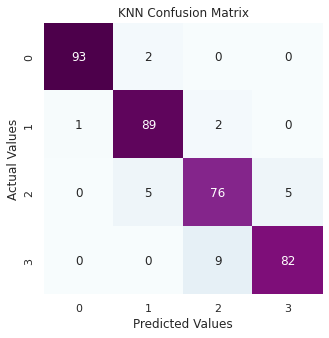

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)


knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_valid)


print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')

The KNN classifier is quite adept at its task.

##SVM Classifier

The SVM algorithm’s purpose is to find the optimum line or decision boundary for categorising n-dimensional space so that we may simply place fresh data points in the proper category in the future. A hyperplane is the optimal choice boundary.


Let us do the implementation of SVM.

SVM Classifier Accuracy Score:  0.9587912087912088
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.94      0.93      0.94        86
           3       0.99      0.96      0.97        91

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



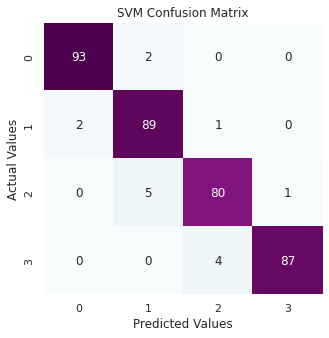

In [ ]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')

svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)


print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')

We can see that the SVM classifier is giving the best accuracy

In [ ]:
# Input and output variables
y=df['price_range']
x=df.drop('price_range',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting the data into test and train dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)
x_train.columns
x_test.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'pixels'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)

In [ ]:
#Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Using multiclass logistic regression
model = LogisticRegression(multi_class='multinomial',solver='lbfgs',fit_intercept=True, )
model.fit(x_train, y_train)
train_preds_proba = model.predict_proba(x_train)
test_preds_proba = model.predict_proba(x_test)
# Get the predicted classes
train_class_pred = model.predict(x_train)
test_class_pred = model.predict(x_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

In [ ]:
train_accuracy

0.9435294117647058

In [ ]:
test_accuracy

0.94

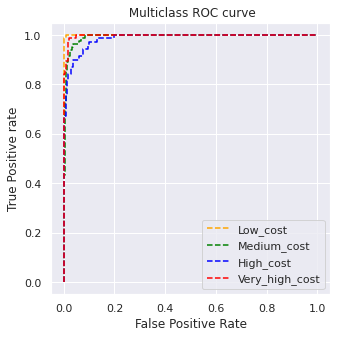

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title(' Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


In [ ]:
# Import Decsion Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
#
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
pred

array([1, 2, 1, 3, 0, 1, 1, 3, 1, 0, 0, 1, 0, 3, 0, 3, 2, 3, 3, 1, 1, 0,
       0, 3, 3, 0, 1, 2, 1, 0, 2, 3, 2, 0, 3, 3, 0, 0, 1, 3, 1, 2, 1, 2,
       3, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 3, 3, 2, 2, 1, 2, 1, 3, 3, 0, 3,
       0, 3, 0, 2, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 2, 1, 0, 3, 1, 1, 2,
       1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 3, 0, 0, 2, 1, 0, 3, 0, 0, 0, 3, 0,
       3, 3, 2, 3, 0, 2, 3, 0, 1, 2, 3, 0, 2, 1, 1, 3, 1, 0, 2, 2, 3, 0,
       2, 0, 2, 3, 3, 3, 1, 0, 1, 2, 3, 2, 1, 1, 1, 3, 1, 0, 2, 3, 0, 1,
       1, 2, 3, 3, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 3, 2, 0, 1, 1, 2, 0, 0,
       2, 3, 3, 2, 2, 0, 3, 1, 1, 1, 0, 3, 3, 1, 1, 1, 2, 0, 3, 1, 1, 1,
       2, 2, 0, 1, 0, 0, 0, 0, 3, 1, 1, 1, 2, 1, 0, 2, 0, 2, 3, 0, 2, 2,
       1, 0, 2, 3, 0, 3, 3, 2, 2, 2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 2, 2, 0,
       3, 2, 0, 2, 2, 3, 3, 0, 3, 1, 0, 3, 3, 0, 0, 0, 3, 1, 0, 0, 3, 3,
       2, 3, 1, 2, 3, 1, 3, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 3, 1, 1,
       2, 0, 2, 3, 0, 3, 0, 2, 1, 1, 3, 2, 0, 0])

In [ ]:
from numpy.lib import shape_base
import shap
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(dt)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(x_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[0]) 
shap_values

[array([ 3.60554642e-02,  0.00000000e+00,  2.21902860e-03,  1.92319415e-04,
         8.36814016e-04, -3.18627451e-04, -5.47453301e-04,  1.87327880e-03,
         6.50031500e-03, -5.27729435e-04, -3.50706086e-04, -3.40515810e-01,
        -5.60462112e-04,  0.00000000e+00,  0.00000000e+00, -2.94117647e-04,
         4.42612159e-02]),
 array([ 7.17635205e-02,  0.00000000e+00, -2.21902860e-03, -1.92319415e-04,
         6.12004793e-04, -2.34313725e-04,  4.36161315e-03, -2.35763581e-03,
        -8.36965642e-03,  5.48888978e-04,  1.35849284e-02,  6.17507319e-01,
        -5.91919939e-04,  0.00000000e+00,  0.00000000e+00,  2.94117647e-04,
         5.88218929e-02]),
 array([-3.61381775e-02,  3.80622837e-04, -2.53339774e-04,  0.00000000e+00,
        -2.27833691e-03, -3.98747209e-04, -4.52961049e-03,  3.89555282e-04,
         1.10323437e-03, -2.11595430e-05, -1.34989282e-02, -1.35321742e-01,
         5.91511456e-04,  0.00000000e+00,  6.66314008e-04,  0.00000000e+00,
        -6.36323728e-02]),
 array(

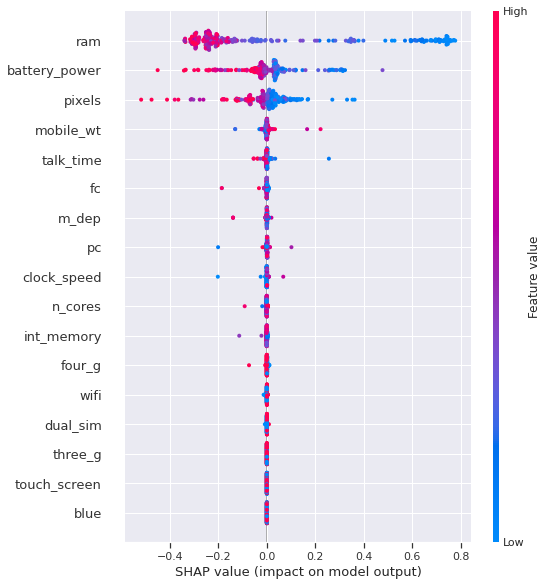

In [ ]:
# Obtain a Scatter Summary Plot 
shap_values = shap.TreeExplainer(dt).shap_values(x_test)
shap.summary_plot(shap_values[0], x_test)

[[-2.65205088e+00  4.93100303e-02  4.15710449e-02  8.76766435e-02
  -1.42795771e-01  2.55653826e-02 -9.70422377e-02  6.36849120e-02
   2.71414589e-01 -4.11976566e-02 -2.22349840e-02 -1.06535937e+01
  -3.90053296e-02 -6.49585200e-02  9.51072665e-02  1.00685915e-01
  -2.55858823e+00]
 [-8.45125185e-01  1.83585657e-02  1.21793479e-02 -2.32464930e-02
  -6.44503199e-03  3.94444587e-02 -1.71569050e-02  7.82699844e-02
   1.30088815e-01 -1.42289681e-01 -3.74525259e-02 -3.35649855e+00
  -9.28223636e-02 -1.18147009e-01  1.63996450e-02  4.16997431e-02
  -7.64002754e-01]
 [ 7.93087072e-01 -7.19294875e-03 -1.25217490e-02 -8.82028446e-02
   1.25516167e-01 -8.38745367e-02 -1.00830712e-01 -6.24681912e-02
  -6.94042022e-04  4.51042676e-02 -1.26246049e-02  3.45801052e+00
  -3.68754242e-03  1.22971054e-01 -1.11367540e-01 -7.74944564e-02
   7.54644728e-01]
 [ 2.70408899e+00 -6.04756472e-02 -4.12286437e-02  2.37726941e-02
   2.37246358e-02  1.88646954e-02  2.15029854e-01 -7.94867052e-02
  -4.00809362e-01  

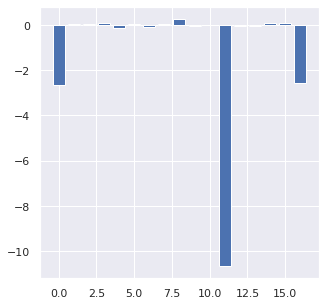

Feature: 0, Score: -0.84513
Feature: 1, Score: 0.01836
Feature: 2, Score: 0.01218
Feature: 3, Score: -0.02325
Feature: 4, Score: -0.00645
Feature: 5, Score: 0.03944
Feature: 6, Score: -0.01716
Feature: 7, Score: 0.07827
Feature: 8, Score: 0.13009
Feature: 9, Score: -0.14229
Feature: 10, Score: -0.03745
Feature: 11, Score: -3.35650
Feature: 12, Score: -0.09282
Feature: 13, Score: -0.11815
Feature: 14, Score: 0.01640
Feature: 15, Score: 0.04170
Feature: 16, Score: -0.76400


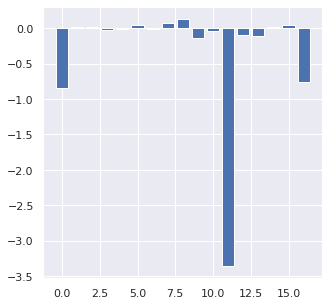

Feature: 0, Score: 0.79309
Feature: 1, Score: -0.00719
Feature: 2, Score: -0.01252
Feature: 3, Score: -0.08820
Feature: 4, Score: 0.12552
Feature: 5, Score: -0.08387
Feature: 6, Score: -0.10083
Feature: 7, Score: -0.06247
Feature: 8, Score: -0.00069
Feature: 9, Score: 0.04510
Feature: 10, Score: -0.01262
Feature: 11, Score: 3.45801
Feature: 12, Score: -0.00369
Feature: 13, Score: 0.12297
Feature: 14, Score: -0.11137
Feature: 15, Score: -0.07749
Feature: 16, Score: 0.75464


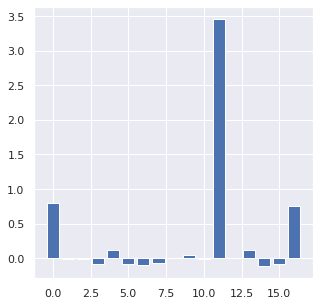

Feature: 0, Score: 2.70409
Feature: 1, Score: -0.06048
Feature: 2, Score: -0.04123
Feature: 3, Score: 0.02377
Feature: 4, Score: 0.02372
Feature: 5, Score: 0.01886
Feature: 6, Score: 0.21503
Feature: 7, Score: -0.07949
Feature: 8, Score: -0.40081
Feature: 9, Score: 0.13838
Feature: 10, Score: 0.07231
Feature: 11, Score: 10.55208
Feature: 12, Score: 0.13552
Feature: 13, Score: 0.06013
Feature: 14, Score: -0.00014
Feature: 15, Score: -0.06489
Feature: 16, Score: 2.56795


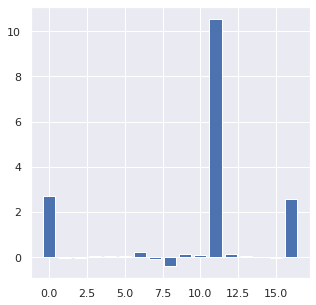

In [ ]:
print(model.coef_)
for i in range(0,4):
 importance = model.coef_[i]
 # summarize feature importance
 for i,v in enumerate(importance):
	 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
 plt.bar([x for x in range(len(importance))], importance)
 plt.show()

##Conclusion
In this article, we looked at classification. Classifiers represent the intersection of advanced machine theory and practical application. These algorithms are more than just a sorting mechanism for organising unlabeled data instances into distinct groupings. Classifiers include a unique set of dynamic rules that include an interpretation mechanism for dealing with ambiguous or unknown values, all of which are suited to the kind of inputs being analysed. Most classifiers also utilise probability estimates, which enable end-users to adjust data categorization using utility functions.

see that here are mobile phones in 4 price ranges. The number of elements is
almost similar.

half the devices have Bluetooth, and half don’t

there is a gradual increase in battery as the price range increases

Ram has continuous increase with price range while moving from Low cost to Very high cost

costly phones are lighter

RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.

form all the above experiments we can conclude that logistic regression and, XGboosting with using hyperparameters we got the best results